In [3]:
from sklearn.cluster import KMeans,MiniBatchKMeans
import numpy as np
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer

from nltk.stem.porter import PorterStemmer

from sklearn import datasets, neighbors
from scipy.spatial.distance import cdist

from collections import Counter


from sklearn.model_selection import TimeSeriesSplit

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics.pairwise import pairwise_distances_argmin_min
from sklearn.metrics.pairwise import pairwise_distances
from wordcloud import WordCloud 

In [4]:
data = pd.read_pickle('amazon_food_review_after_preprocess_v2')

In [5]:
CleanedTextMe = data['CleanedTextMe']

In [6]:
x_train = CleanedTextMe

In [7]:
#TRAINING VECTORIZER ON TRAIN DATA
count_vect = CountVectorizer(ngram_range=(1,1)) #scikit-learn countevectorizer (bi-gram)
final_counts = count_vect.fit_transform(x_train.values)

In [8]:
#STORING VOCABULARY
cnt_vect_feat = count_vect.get_feature_names()

In [9]:
final_counts.shape

(364171, 94429)

In [ ]:
#kmeans = KMeans(n_clusters=2, random_state=0).fit(final_counts)

In [56]:
#kmeans_mini_batch = MiniBatchKMeans(n_clusters=10, batch_size=10000,random_state=42).fit(final_counts)


In [10]:
#len(kmeans_mini_batch.cluster_centers_)

In [ ]:
cost = []
K = range(1,50)
for k in K:
    #print(k)
    kmeanModel = MiniBatchKMeans(n_clusters=k,batch_size=10000,random_state=42)
    kmeanModel.fit(final_counts)
    cost.append(sum(np.min(pairwise_distances(X=final_counts, Y=kmeanModel.cluster_centers_, metric='euclidean'), axis=1))/final_counts.shape[0])


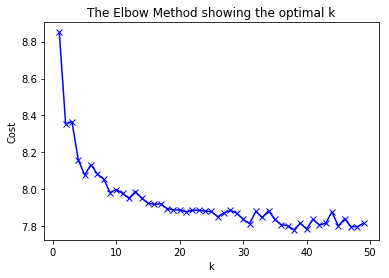

In [12]:
plt.plot(K, cost, 'bx-')
plt.xlabel('k')
plt.ylabel('Cost')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [13]:
cost

[8.850083265864289,
 8.354285571981219,
 8.366301609612615,
 8.159533460011996,
 8.078470841522774,
 8.134448938956568,
 8.083554674126018,
 8.056847890179617,
 7.983491704494328,
 7.999892005583308,
 7.978734705444058,
 7.952016316464533,
 7.988488975533933,
 7.953284784682263,
 7.925750297433183,
 7.920222130961892,
 7.922431747250756,
 7.896665323979305,
 7.889679393675984,
 7.889383664097225,
 7.878928201851618,
 7.88751641121928,
 7.887514841480035,
 7.882772239388,
 7.881108433349146,
 7.852196782520028,
 7.874507665510054,
 7.888002614397941,
 7.87079163761468,
 7.838681021191705,
 7.8149533696708895,
 7.881354463081014,
 7.848634426728319,
 7.8848341493674985,
 7.838422511642394,
 7.809820911474031,
 7.804190344880091,
 7.781452807298132,
 7.817851488153543,
 7.786595792210845,
 7.83855233462577,
 7.809211293810427,
 7.816228652195713,
 7.878636634336737,
 7.802503957362326,
 7.841831605680146,
 7.799277726656646,
 7.7986172783773595,
 7.8180934173412115]

In [14]:
kmeans_mini_batch = MiniBatchKMeans(n_clusters=20, batch_size=10000,random_state=42).fit(final_counts)


In [15]:
labels = kmeans_mini_batch.labels_

In [16]:
closest, _ = pairwise_distances_argmin_min(kmeans_mini_batch.cluster_centers_, final_counts)

In [17]:
closest

array([ 58104, 305253, 329017,  34987, 330321, 121285, 113906, 301993,
        11127,  20292,  99760,  99760,  89298, 115053, 192838, 289067,
       272074,  69624,  37455,  48320], dtype=int64)

In [18]:
kmeans_mini_batch.cluster_centers_.shape

(20, 94429)

In [19]:
mydict = {i: np.where(kmeans_mini_batch.labels_ == i)[0] for i in range(kmeans_mini_batch.n_clusters)}

In [20]:
dictlist = []
for key, value in mydict.items():
    temp = [key,value]
    dictlist.append(temp)

In [82]:
mydict[1]

array([    55,    106,    242, ..., 363572, 363598, 363959], dtype=int64)

In [39]:
rev = CleanedTextMe.iloc[mydict[0][0]].decode('UTF-8')

In [43]:
tokens = []

In [83]:
for i in range(mydict[2].shape[0]):
    review = CleanedTextMe.iloc[mydict[2][i]].decode('UTF-8')
    words = review.split()
    tokens.extend(words)

In [84]:
token_arr =np.array(tokens)

In [86]:
for i in range(len(token_arr)): 
    token_arr[i] = token_arr[i].lower() 

In [87]:
comment_words = ' '

In [88]:
comm = ' '.join(token_arr)

In [89]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comm) 

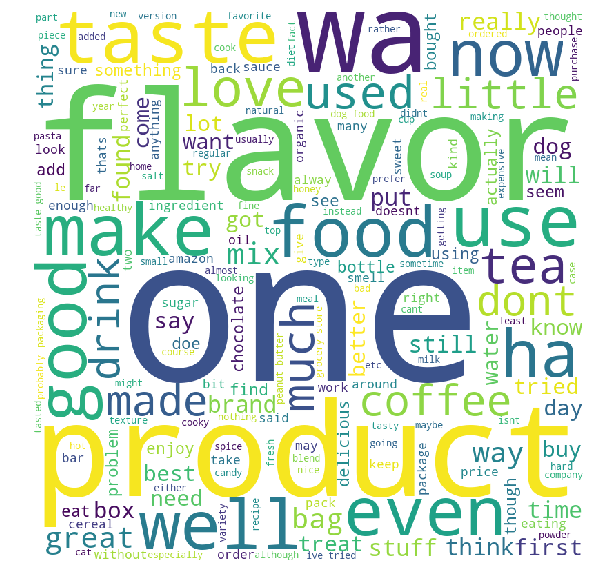

In [90]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 